In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score

In [132]:
data=pd.read_csv('credit_card.csv')
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [133]:
fraud=data[data['Class']==1]
n_fraud=data[data['Class']==0] 

In [172]:
down_sample=resample(n_fraud, replace=False, n_samples=len(fraud),random_state=42)
new_data=pd.concat([fraud,down_sample]) 

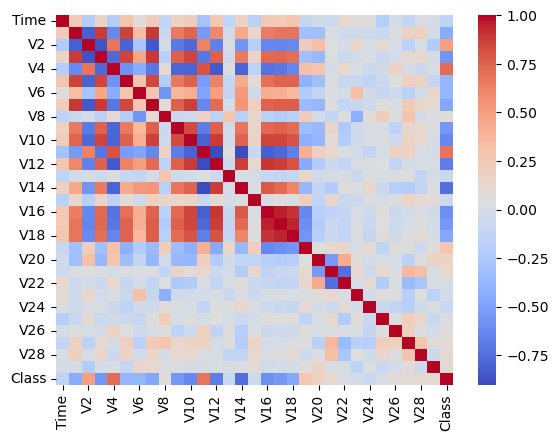

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.243263 -0.217137  0.155027 -0.208862  0.283542  0.075980   
V1      0.243263  1.000000 -0.816943  0.882471 -0.619965  0.865225  0.329310   
V2     -0.217137 -0.816943  1.000000 -0.867410  0.681796 -0.805321 -0.281813   
V3      0.155027  0.882471 -0.867410  1.000000 -0.771848  0.857642  0.461689   
V4     -0.208862 -0.619965  0.681796 -0.771848  1.000000 -0.581868 -0.439029   
V5      0.283542  0.865225 -0.805321  0.857642 -0.581868  1.000000  0.293905   
V6      0.075980  0.329310 -0.281813  0.461689 -0.439029  0.293905  1.000000   
V7      0.217504  0.889875 -0.847130  0.891757 -0.710074  0.847129  0.275501   
V8     -0.139904 -0.084553 -0.020836 -0.172597  0.101289 -0.206569 -0.572640   
V9      0.190114  0.663959 -0.695144  0.757439 -0.787982  0.667176  0.365317   
V10     0.215099  0.745482 -0.768706  0.854791 -0.794519  0.762153  0.417039   
V11    -0.297619 -0.540378  0.621377 -0.

In [135]:
matrix=new_data.corr()
sns.heatmap(matrix, annot=False, cmap="coolwarm")
plt.show()
print(matrix) 

In [136]:
related_features=matrix['Class'][abs(matrix['Class'])> 0.1].index.tolist()
related_features.remove('Class')
print(f"Selected features:{related_features}") 

Selected features:['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21']


In [137]:
x=new_data[related_features]
y=new_data['Class']

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y) 

In [139]:
model=DecisionTreeClassifier(random_state=42,max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [140]:
y_pred=model.predict(x_test)

In [141]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
conf_matrix = confusion_matrix(y_test, y_pred)

In [158]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.92
Precision: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        99
           1       0.90      0.96      0.93        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



Confusion Matrix:
[[88 11]
 [ 4 94]]


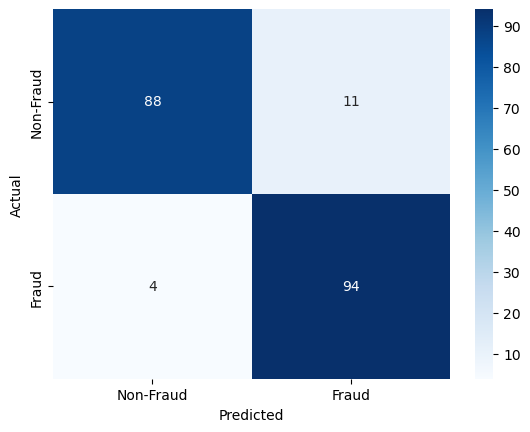

In [160]:
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()